In [1]:
import os
import numpy as np
from scipy.misc import imread
import pandas as pd
import matplotlib.pyplot as plt
import glob
from linear_model_MOM import *

### Test using tiny_imagenet database (4Mb of image used, the whole dataset weight 400Mb) that can be found https://tiny-imagenet.herokuapp.com/ or I could put it on the git.

In [2]:
f=imread('tiny_imagenet/n01443537/images/n01443537_0.JPEG')

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


In [3]:
np.shape(f)

(64, 64, 3)

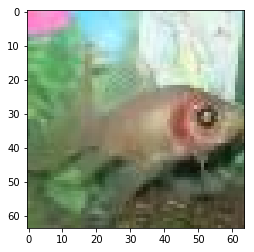

In [4]:
plt.imshow(f)
plt.show()

In [5]:
p=imread('tiny_imagenet/n02056570/images/n02056570_42.JPEG')

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


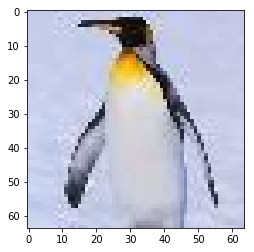

In [6]:
plt.imshow(p)
plt.show()

## Test tensorflow

In [7]:
from cnn_mom import CNN_MOM
files=glob.glob('tiny_imagenet/n01443537/images/*.JPEG')+glob.glob('tiny_imagenet/n02056570/images/*.JPEG')
y=np.hstack([np.ones(500),np.zeros(500)])
perm=np.random.permutation(1000)
y=y[perm]
files=np.array(files)[perm]
y=np.array(y)
train=list(range(int(9*len(y)/10)))
test=list(range(int(9*len(y)/10),len(y)))

In [8]:
import time
a=time.time()

clf=CNN_MOM(K=3,channels=[16,32],final_layer_shape=80,learning_rate=3e-3,beta=1e-2,epochs=750,epoch_count=10,batch_size=142,regex=False)
clf.fit(files[train],y[train])
pred=clf.predict(files[test])
print(time.time()-a,'s')
print("Resultat : ",np.mean(y[test]==pred))

142
Epoch: 1 cost = 0.697  en environ  1.6782982349395752 s
Epoch: 11 cost = 0.695  en environ  18.77178120613098 s
Epoch: 21 cost = 0.653  en environ  36.03148865699768 s
Epoch: 31 cost = 0.312  en environ  52.95556879043579 s
Epoch: 41 cost = 0.238  en environ  69.64753651618958 s
Epoch: 51 cost = 0.139  en environ  86.43503189086914 s
Epoch: 61 cost = 0.197  en environ  103.25319862365723 s
Epoch: 71 cost = 0.164  en environ  120.17356133460999 s
Epoch: 81 cost = 0.135  en environ  137.07601714134216 s
Epoch: 91 cost = 0.210  en environ  153.9271764755249 s
Epoch: 101 cost = 0.158  en environ  171.02180457115173 s
Epoch: 111 cost = 0.110  en environ  187.84124398231506 s
Epoch: 121 cost = 0.055  en environ  204.93373370170593 s
Epoch: 131 cost = 0.125  en environ  221.52616620063782 s
Epoch: 141 cost = 0.144  en environ  238.6182849407196 s
Epoch: 151 cost = 0.101  en environ  255.2551236152649 s
Epoch: 161 cost = 0.119  en environ  272.2587242126465 s
Epoch: 171 cost = 0.105  en en

### Résultats variant entre 0.93 et 0.99. Il faudrait augmenter epoch pour avoir des résultats plus stable et meilleurs (mais en plus de temps)

### Comparaison CNN

In [9]:
from cnn import CNN
a=time.time()
clf=CNN(channels=[16,32],final_layer_shape=80,learning_rate=3e-3,beta=1e-2,epochs=250,epoch_count=50,regex=False)
clf.fit(files[train],y[train])
pred=clf.predict(files[test])
print(time.time()-a,'s')
print("Resultat : ",np.mean(y[test]==pred))

Epoch: 1 cost = 0.699  en environ  5.687585115432739 s
Epoch: 51 cost = 0.178  en environ  265.21485686302185 s
Epoch: 101 cost = 0.120  en environ  528.2301776409149 s
Epoch: 151 cost = 0.099  en environ  797.5174868106842 s
Epoch: 201 cost = 0.036  en environ  1063.6464412212372 s
Weights saved in graph_cnn.tf
INFO:tensorflow:Restoring parameters from graph_cnn.tf
1321.9694077968597 s
Resultat :  0.94


### Gain de temps substantiel.